# Extended Data Figure 2 - Ye et al. 2023

- import dependencies and load the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import pandas as pd
import warnings
import pickle
import seaborn as sns
from matplotlib.offsetbox import AnchoredOffsetbox
sns.set_style("ticks")
warnings.filterwarnings('ignore')

In [2]:
def plot_extended_data_fig2d():
    with_sp = pd.read_hdf('../data/Extended_Figure2/rodent_memory_replay_with_sp.h5')
    without_sp = pd.read_hdf('../data/Extended_Figure2/rodent_memory_replay_without_sp.h5')
    with_sp_NE = with_sp['ne_nonreduced'][0]
    with_sp_NE = np.nanmean(with_sp_NE, axis = (1,2))
    without_sp_NE = without_sp['ne_nonreduced'][0]
    without_sp_NE = np.nanmean(without_sp_NE, axis = (1,2))

    remove_nan = lambda x: x[~np.isnan(x)]
    remove_extreme = lambda x: x[x<10]
    with_sp_NE = remove_nan(with_sp_NE)
    with_sp_NE = remove_extreme(with_sp_NE)

    without_sp_NE = remove_nan(without_sp_NE)
    without_sp_NE = remove_extreme(without_sp_NE)
    fig, axes = plt.subplots(1,  figsize=(6, 7))

    dfs = []
    with_pyramid = ["without"] * len(without_sp_NE) + ["with"] * len(with_sp_NE)

    df_ = pd.DataFrame(
            np.array([
                np.r_[without_sp_NE, with_sp_NE],
                with_pyramid,
            ]).T,

    columns=['Normalized Error', 'cond'])

    df_['dataset'] = 'iRodent'

    df_['Normalized Error'] = df_['Normalized Error'].astype("float64")
    df_['cond'] = df_['cond'].astype("category")
    df_['dataset'] = df_['dataset'].astype("category")

    dfs.append(df_)

    vp = sns.violinplot(
            df_, y='dataset', x='Normalized Error', hue='cond', split=True, hue_order=['without', 'with'],
            inner="quart", linewidth=1, palette={"with": "#9cb5d8", "without": ".85"},
            ax=axes, bw='scott',
        )
    sns.despine(ax=axes, left=True, top=True, right=True)

    axes.set_yticks([])
    axes.set_ylabel("")
    axes.legend().remove()
    handles, labels = axes.get_legend_handles_labels()
    fig.legend(
        handles,
        ['Without resolution consistency', 'With resolution consistency'],
        frameon=False,
        ncol=1,
        # loc='lower right',
        fontsize='medium',
        bbox_to_anchor=(0.9, 0.2),
    )
    axes.legend().remove()
    fig.savefig('Extended_data_Figure2d', dpi=600, bbox_inches='tight', pad_inches=0.05)

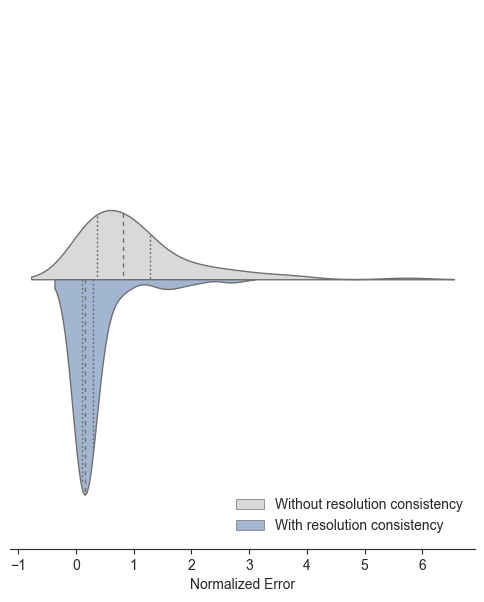

In [3]:
plot_extended_data_fig2d()